<h1 style="color:Green;">Week 3 Lab - due by 24th July, 2022 (11:59 pm CDT )</h1> 

<a style="color:purple;" href="https://docs.google.com/presentation/d/1_n1rKmuN1fnPN-HWJTYn4zPI4bsTCCEGI8HsmDpRSkc/edit#slide=id.g11b032e97d3_0_0">[Week 3 Lecture Link Here]</a>

<h2 style="color:black;"> Objective: to implement machine learning methods and models on regression problems</h2> 

<h2 style="color:Green;">Setup and Loading Packages</h2> Setup and Loading Packages

In [283]:
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import pandas_datareader as pdr

from sklearn.ensemble import RandomForestRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

<h2 style="color:Green;">Problem 1: Real GDP Growth Rate Predictions by Country</h2><br/>

Gross Domestic Products (GDP) growth has been a hot topic in macroeconomics and an economist on your team needs your help to uncover its implications from a statistical learning perspective. The economist gathered some data from the U.S. Bureau of Economic Analysis (BEA) and OECD’s Composite Leading Indicators (CLIs) repositories. The U.S. BEA stores macro and micro-economic measures on a multinational level as the OECD CLIs screens the conditions that dictates the economic booms and busts of OECD countries. <br><br>

4 indictors are gathered from each of the 10 selected OECD countries: monthly real income, employment, industrial production, and wholesale-retail sales. The countries include the United States, United Kingdom, Netherlands, Luxembourg, Japan, Korea, Germany, France, Denmark, and Canada. The indicators are collected over the past 240 months (20 years), from October 1999 to September 2019, so there is a total of 2400 observations. <br><br>

The economist wants to examine the predictive power of these features in a linear model that forecasts the real Gross Domestic Products (GDP) growth rate for each country. 

<p style="color:red;">PLEASE DO NOT CHANGE THIS CODE !!!</p>

In [284]:
# loading the csv data set from local directory
OECD = pd.read_csv('OECD_DATA.csv'); OECD = OECD.set_index('Date')
# converting real GDP index to growth rate (we do not take the log this time)
OECD['realGDP'] = OECD['realGDP'].pct_change()
# drop NaN values
OECD = OECD.dropna()
OECD.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2399 entries, 11/1/1999 to 9/1/2019
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      2399 non-null   object 
 1   realGDP      2399 non-null   float64
 2   realPersInc  2399 non-null   float64
 3   unempRate    2399 non-null   float64
 4   indProd      2399 non-null   float64
 5   retailSales  2399 non-null   float64
dtypes: float64(5), object(1)
memory usage: 131.2+ KB


a) Based on the economist's specified problem, please identify the explanatory and response variables in the data set.

The explanatory variables in this dataset are the different features used to predict the response variable. The different features in this dataset are the monthly real income, employment, industrial production, and wholesale-retail sales.

The response variable in this dataset is the real Gross Domestic Products growth rate for each country. We would like to forecast the real GDP growth rate for all of the countries that are being observed.  

b) To make sure the units of the features are aligned, please standardize the numerical features. (Note we cannot standardize categorical features)

In [285]:
################ EDIT CODE LINES HERE #################
FEATURES = OECD.columns[2:]# gets the different Features,Explanatory Variables
# Features starts from 2 and not 1 because country is a categorical variable and realGDP is the response variable
OECD.loc[:, FEATURES] = scale(OECD.loc[:, FEATURES]) # standardizing indicators

#####################################################

c) Notice that since the Country variable is a categoirical variable, we need to use some kind of numeric indicator to replace the string values in that column. We use dummy variables. A dummy variable is a binary variable that indicates whether a separate categorical variable takes on a specific value. For example, we will add 9 columns  to the data set and name column by the syntax 'Country_[country name]'. Each column will only take on the values 0 or 1; 0 represents that the observation on that row does not belong to the country and 1 represents that the observation on that row belongs to the country. For example, the rows where the Country value is USA' will have the Country_USA column being 1, and the Country_Denmark, Country_France, and so on columns being 0. <br><br>

You may ask why we added 9 columns when there are 10 countries in our original data set. This is because when all 9 dummy variables are set to 0, the regression output will represent the result for the country that doesn't have its own added column. <br><br>

Read this blog for more details: https://abbynyakara.medium.com/dummy-variables-in-machine-learning-b3991367bd59
<p style="color:red;">PLEASE DO NOT CHANGE THIS CODE !!!</p>

In [286]:
# declaring dummy variables based on the Country column
OECD = pd.get_dummies(data=OECD, drop_first=True)
# update the FEATURES variable
FEATURES = OECD.columns[1:]
# display top rows of the new data set
OECD.head()

,realGDP,realPersInc,unempRate,indProd,retailSales,Country_Denmark,Country_France,Country_Germany,Country_Japan,Country_Korea,Country_Luxembourg,Country_Netherlands,Country_UK,Country_USA
Date,,,,,,,,,,,,,,
11/1/1999,0.000988,1.796302,-0.821803,-0.808932,-0.384360,0,0,0,0,0,0,0,0,1
12/1/1999,0.000691,1.775151,-0.871149,-0.748722,-0.286125,0,0,0,0,0,0,0,0,1
1/1/2000,0.000592,1.769032,-0.871149,-0.746977,-0.346280,0,0,0,0,0,0,0,0,1
2/1/2000,0.000591,1.769869,-0.821803,-0.723416,-0.288399,0,0,0,0,0,0,0,0,1
3/1/2000,0.000690,1.764942,-0.871149,-0.695493,-0.261159,0,0,0,0,0,0,0,0,1


Please run the above code chunk an observe that the new columns are added to the original data frame to represent the dummy variables. <br><br>
Now, please write a code piece to split the data into 75% training and 25% testing sets.

In [287]:
################ EDIT CODE LINES HERE #################
RESPONSE = OECD.columns[0]
X_train, X_test, y_train, y_test = train_test_split(OECD.loc[:, FEATURES], OECD.loc[:, RESPONSE], test_size=0.25, random_state=0)
######################################################

d) We are told by the economist that all the features are very important predictors for the GDP growth rate, and hence, we will take his words and skip the exploration of importance scores. He also mentions that there is no multicollinearity based on his initial analysis. <br><br> 
Please validate the economist's statements, in other words, show that:
<ul>
  <li>All the features (excluding the dummy variables) are important</li>
  <li>No multicollinearity exists between features </li>
</ul>
To respect the economist's claims, please DO NOT drop any features. (Hint: the dummy variables should not be significant, but keep them because we need them to make predictions for each country)

<i>Test feature importance here:</i>

Text(0.5, 0, 'Relative Importance')

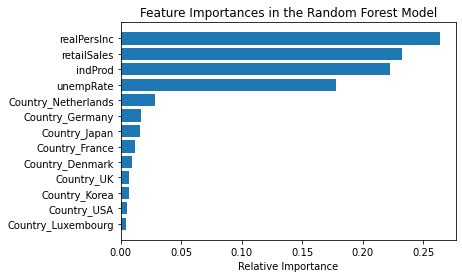

In [289]:
################ EDIT CODE LINES HERE #################
from sklearn.ensemble import RandomForestRegressor # importing the random forest module
rf_model = RandomForestRegressor(random_state=0) # define the random forest model
rf_model.fit(X_train, y_train) # fit the random forest model
importances = rf_model.feature_importances_ # get importance
indices = np.argsort(importances) # sort the features' index by their importance scores
plt.title('Feature Importances in the Random Forest Model')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [FEATURES[i] for i in indices])
plt.xlabel('Relative Importance')
######################################################

<i>Test multicolinearity here:</i>

In [290]:
################ EDIT CODE LINES HERE #################
from statsmodels.stats.outliers_influence import variance_inflation_factor
VIF = [variance_inflation_factor(OECD.loc[:, FEATURES].values, i) for i in range(len(FEATURES))]
VIF_table = pd.DataFrame({'Features': FEATURES, 'VIF': VIF})
VIF_table   
# The following values indicate that there's a moderate correlation among all the features, not a high correlation. 
# All of the Features have a VIF value of 1-5.
######################################################

,Features,VIF
0,realPersInc,1.723912
1,unempRate,2.435666
2,indProd,2.242862
3,retailSales,2.094585
4,Country_Denmark,1.166142
5,Country_France,1.891253
6,Country_Germany,1.134902
7,Country_Japan,1.186148
8,Country_Korea,1.977866
9,Country_Luxembourg,1.411761


e) Please wirte a code piece to fit a multiple linear regression to the data, then print the resulting Adjusted R-squared, MAE, and RMSE metrics. 

In [291]:
################ EDIT CODE LINES HERE #################
linear_model = LinearRegression()
#fit regression model
linear_model = linear_model.fit(X_train, y_train)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_test_pred = linear_model.predict(X_test)
r2 = r2_score(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
rmse = mean_squared_error(y_test, y_test_pred, squared=False)

print('The Adjusted R-squared is: ', 1-(1-r2)*(OECD.shape[0]-1)/(OECD.shape[0]-len(FEATURES)-1))
print('The MAE is: ', mae)
print('The RMSE is: ', rmse)
mae +rmse
######################################################

The Adjusted R-squared is:  -0.00016040239222148145
The MAE is:  0.0011117728989690704
The RMSE is:  0.0015994744800071979


0.0027112473789762683

f) Please wirte a code piece to fit a ridge regression to the data, then print the resulting Adjusted R-squared, MAE, and RMSE metrics.

In [292]:
################ EDIT CODE LINES HERE #################
from sklearn.linear_model import RidgeCV
# initiate the 5-Fold cross validation 
ridge_model = RidgeCV(cv=5, scoring='r2')
# fit the model with the best alpha
ridge_model = ridge_model.fit(X_train, y_train)
y_test_pred_ridge = ridge_model.predict(X_test)
r2_ridge = r2_score(y_test, y_test_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_test_pred_ridge)
rmse_ridge = mean_squared_error(y_test, y_test_pred_ridge, squared=False)
# printing model metrics
print('The Adjusted R-squared is: ', 1-(1-r2_ridge)*(OECD.shape[0]-1)/(OECD.shape[0]-len(FEATURES)-1))
print('The MAE is: ', mae_ridge)
print('The RMSE is: ', rmse_ridge)
mae_ridge+rmse_ridge
######################################################

The Adjusted R-squared is:  -0.0011210804926706786
The MAE is:  0.0011116109555797656
The RMSE is:  0.0016002424624718444


0.00271185341805161

g) Please wirte a code piece to fit a lasso regression to the data, then print the resulting Adjusted R-squared, MAE, and RMSE metrics.

In [293]:
################ EDIT CODE LINES HERE #################
from sklearn.linear_model import LassoCV
# initiate 5-Fold cross validation 
lasso_model = LassoCV(cv=5) # uses scoring='r2'by default
# fit the model with the best alpha
lasso_model = lasso_model.fit(X_train, y_train)
y_test_pred_lasso = lasso_model.predict(X_test)
r2_lasso = r2_score(y_test, y_test_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_test_pred_lasso)
rmse_lasso = mean_squared_error(y_test, y_test_pred_lasso, squared=False)

# printing model metrics
print('The Adjusted R-squared is: ', 1-(1-r2_lasso)*(OECD.shape[0]-1)/(OECD.shape[0]-len(FEATURES)-1))
print('The MAE is: ', mae_lasso)
print('The RMSE is: ', rmse_lasso)
mae_lasso +rmse_lasso
######################################################

The Adjusted R-squared is:  -0.0016100473091211764
The MAE is:  0.0011125699424768829
The RMSE is:  0.0016006332093845773


0.00271320315186146

h) Compare the three models you just fitted. Which one turns out to be the best and why? (Hint: since we included 9 dummy variables in the model that are not as significant, we may be overfitting, hence leading to a negative adjusted R-squared. You can ignore the adjusted R-squared if this happends, and just compare the MAE and RMSE.)

Fix the wording of the usage of MAE and RMSE


All three of our models result in a negative adjusted R-squared value which suggests that there is overfitting in all three of these multiple linear regression models. Overfitting occurs when the model is overly complex and there are too many parameters compared to the amount of observations. Overfitted models have low bias and high variance. Since there are negative adjusted R-squared values, we should not pay attention the values itself, but use the mean absolute error(MAE) and root mean standard error(RMSE) to see which regression model best fits the data. The Lasso regression model seems to be the worst model out of the three as it has the highest MAE and RMSE with values of 0.0011126 and 0.0016006 respectively. This shows that it has the largest magnitude of prediction errors and the highest standard error. The last two regression models that we have to analyze are the multiple linear regression model and the ridge regression. The ridge regression model has the lower mean absolute error wiht a value of 0.0011116. The multiple linear regression model has the lower root mean standard error with a value of 0.00159947. Both of these errors are good predictors for average errors of different models. In this case, we would want to analyze the RMSE more since it puts more weight on large errors. We know this because in the formula, the errors are squared before they are averaged. Due to this, it is better to use the Multiple Linear Regression Model as it has the lower root mean standard error.  

The Multiple Linear Regression Model is the best model to use out of the three types of regression models. This model overfits the dataset the least as compared to ridge regression and lasso regression. We have a negative Adjusted R-squared value which implies that there is overfitting in this model. On average, the distances of the predicted returns for the growth rate of Real GDP from their actual observations is 0.0011117728989690704. The square root of the average of squared differences of the growth rate of Real GDP predictions and their actual observations is 0.0015994744800071979.

i) Based on the model you selected, write a code piece that prints the intercept and coefficient estimates, then write out the formula based on the printed output.

We used multiple linear regression as we figured that it was relatively the strongest model for predicting the real GDP growth rate.

In [294]:
################ EDIT CODE LINES HERE #################
print('intercept: ', linear_model.intercept_)
print('coefficients: ', linear_model.coef_)
################ EDIT CODE LINES HERE #################

intercept:  -0.0002038638395117495
coefficients:  [ 1.05993564e-04  3.74296397e-04  2.19173918e-04  1.88501122e-05
  8.18097003e-05 -4.74259565e-04 -5.29082145e-05  3.77789866e-04
  9.39144404e-04  3.24067560e-04  2.02917379e-04  9.73525532e-05
  2.50596174e-04]


The formula for predicting the real GDP Growth rate would be:
y-hat = -0.0002038638395117495 + 1.05993564e-04(Real Personal Income) +3.74296397e-04(Unemployment Rate) +2.19173918e-04(Industrial Production) +       1.88501122e-05(Retail Sales) + 8.18097003e-05(Denmark is the country) -4.74259565e-04(France is the country) -5.29082145e-05(Germany is the country) +  3.77789866e-04(Japan is the country) +9.39144404e-04(Korea is the country) + 3.24067560e-04(Luxembourg is the country) + 2.02917379e-04 (Netherlands is the country) + 9.73525532e-05(UK is the country) + 2.50596174e-04(United States is the Country)

where y-hat is equal to the Predicted real GDP Growth Rate

j) What can be don't to improve the Adjusted $R^2$ ?

In this scenario, there is low bias and high variance resulting in overfitting of a graph. To improve the adjusted R-squared we can increase our training set and decrease our testing set. This will ultimately increase our Adjusted R^2 value as there would be an increase in the amount of data that is to be tested on. Another way to improve the Adjusted R^2 value is to just increase the sample size. If more data is collected, our model has more data to be trained and tested on improving the model. Another way to improve this adjusted R^2 value is to reduce the amount of features that are used. Examples of removable features are variables that have almost no impact on the response variable. If we remove the right features, R^2 value would fit better and not overfit the data. 